In [6]:
import icf
import matplotlib.pyplot as plt


xdata, ydata = icf.load_2col("Earliest_image_ROI.csv")


In [ ]:
xdata *= 60 #resolution
xdata /= 3.5 #magnitication effect

In [9]:
import statistics as s
print("Mean:", s.mean(xdata))
print("Variance: ", s.variance(xdata))
print("Population stdev: ", s.pstdev(xdata))
print("Sample stdev: ", s.stdev(xdata))

Mean: 300.0
Variance:  32620.408163265307
Population stdev:  178.08505191139912
Sample stdev:  180.61120719176125


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import icf


# This function will generate a perfect Gaussian 
# You can replace this function with any other you want to fit with...
def gaussian(x, *params):

	A = params[0]
	x1 = params[1]
	c = params[2]
	
	return A*np.exp(-(x-x0)**2/(2*c*c))

	
	
#
# This section will make a numpy array containing a gaussian 
#

# This makes a numpy array with 100 equally spaced points between 0 and 4
xdata = np.linspace(0,4,100)

# This makes a gaussian using these x points
ydata = gaussian(xdata, 3, 2, 0.2)

# Lets add some noise
for i in range(len(ydata)):
	ydata[i] +=  0.4*(np.random.random_sample()-0.5)


#
# This section will do a fit
#

# This does the fit, and returns the fit parameters and the covariances

guess = [1,1,1]
print("Our initial guess is", guess)
popt, pcov = curve_fit(gaussian, xdata, ydata, p0=guess)



for i in range(len(popt)):
	print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
	
print("Fit parameters : ", popt)
print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))


# This generates a new list with a Gaussian using the identified fit parameters
# This data is therefore the best fit curve 
yfit = gaussian(xdata, *popt)

print("R^2 = ", icf.r_squared(ydata, yfit))

# This will plot the output, both the original data and the best fit, as well as a residual
# Note this is a special plotting routine written for the icf labs, hence the 'icf' prefix
# The source code can be found in icf.py if you want to copy/alter it
 
icf.fit_plot(xdata, ydata, yfit)

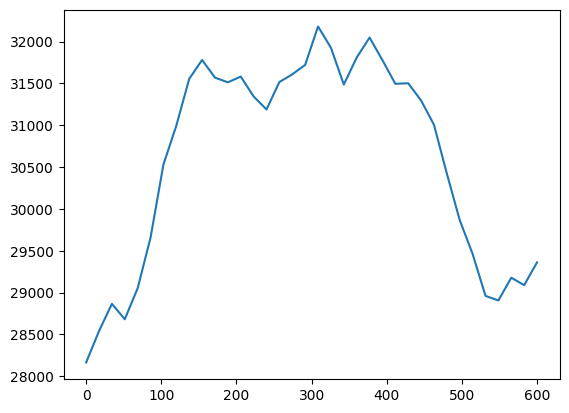

In [7]:
plt.plot(xdata, ydata)
plt.show()
